In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn 

# to ignore all warning 
import warnings 
warnings.filterwarnings('ignore')

#### Import data

In [2]:
data = pd.read_csv('stroke/healthcare-dataset-stroke-data.csv')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


#### Explore Data

In [3]:
data.shape

(5110, 12)

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
for col in data.columns: 
    if data[col].dtype == 'object':
        print(f'{col} : {data[col].unique()}')

gender : ['Male' 'Female' 'Other']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
for col in data.columns: 
    print(f'{col} : {data[col].nunique()}')

id : 5110
gender : 3
age : 104
hypertension : 2
heart_disease : 2
ever_married : 2
work_type : 5
Residence_type : 2
avg_glucose_level : 3979
bmi : 418
smoking_status : 4
stroke : 2


In [8]:
data[data.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [9]:

data.bmi.iloc[1]

nan

In [10]:
data[data.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


#### Visual Exploration

<Axes: >

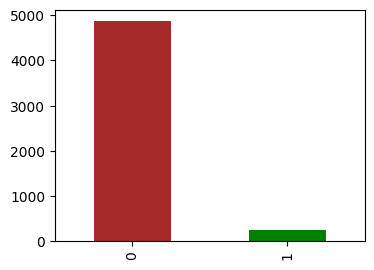

In [11]:
plt.figure(figsize=(4,3))
data.stroke.value_counts().plot(kind='bar', color=['brown', 'green'])

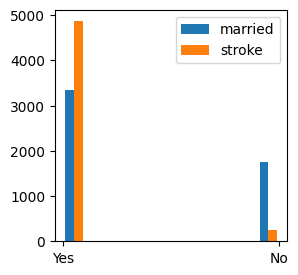

In [12]:
plt.figure(figsize=(3,3))
plt.hist([data.ever_married, data.stroke],label=['married', 'stroke'])
plt.legend()
plt.show()

#### data Cleaning

In [13]:
clean_data = data[data.gender != 'Other']

In [14]:
bmi_mean = '{:.2f}'.format(clean_data.bmi.mean())
clean_data.bmi.fillna(bmi_mean, inplace=True)

In [15]:
clean_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
clean_data.smoking_status[clean_data.smoking_status == 'Unknown'] = 'Not Sure'

In [17]:
clean_data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Not Sure'],
      dtype=object)

In [18]:
# drop ID column 
clean_data.drop(columns=['id'], inplace=True)
clean_data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


#### Data Transformation

In [19]:
clean_data.bmi = clean_data.bmi.astype('float64')

In [20]:
for col in clean_data.columns: 
    if clean_data[col].dtype == 'object':
        print(f'{col} : {clean_data[col].unique()}')

gender : ['Male' 'Female']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Not Sure']


In [21]:
# clean_data.gender.astype('category')

In [22]:
# converting object type column to category
for col in clean_data.columns: 
    if clean_data[col].dtype == 'object':
        clean_data[col] = clean_data[col].astype('category')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   ever_married       5109 non-null   category
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 305.1 KB


In [23]:
# converting each category type now to code e.g gender (male:1 and female:0)
for col in clean_data.columns: 
    if clean_data[col].dtype == 'category':
        clean_data[col] = clean_data[col].cat.codes

In [24]:
# visualizing the converted category to code (numeric representation) looks like
clean_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


#### Data Balacing

In [25]:
# extracting X (independent variable), and y (dependent variable) 
y = clean_data.stroke
x = clean_data.drop(columns=['stroke'])

In [26]:
# using hybridize synthetic Minority Oversampling Eddited Nearest Neighbout (SMOTEENN) to
# balance the dataset.......
sm = SMOTEENN()
xres , yres = sm.fit_resample(x, y)
print(yres.value_counts())

1    4558
0    3635
Name: stroke, dtype: int64


Text(0.5, 1.0, 'Oversampled Dataset')

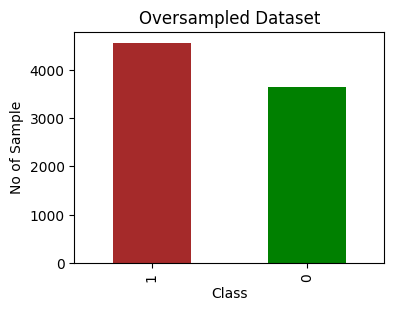

In [27]:
# the class is almost the same size.. the dataset class 0 and 1 is now almost balance this will 
# reduce biased prediction
plt.figure(figsize=(4,3))
yres.value_counts().plot(kind='bar', color=['brown', 'green'])
plt.ylabel('No of Sample')
plt.xlabel('Class')
plt.title('Oversampled Dataset')

In [28]:
xres

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.000000,0,0,0,4,0,95.120000,18.000000,0
1,0,8.000000,0,0,0,2,1,110.890000,17.600000,0
2,1,14.000000,0,0,0,1,0,161.280000,19.100000,0
3,0,47.000000,0,0,1,2,1,210.950000,50.100000,0
4,0,79.000000,0,0,1,0,1,77.080000,35.000000,0
...,...,...,...,...,...,...,...,...,...,...
8188,0,45.227729,0,0,1,2,0,63.956109,29.428466,2
8189,0,79.245278,0,0,1,2,0,75.400181,30.167900,2
8190,1,68.754223,0,1,0,1,0,222.097802,31.648592,1
8191,0,62.138386,0,0,1,0,0,197.502663,29.695609,1


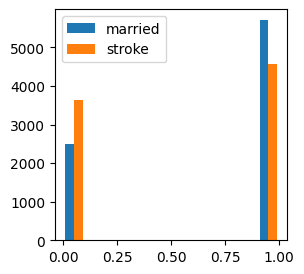

In [29]:
plt.figure(figsize=(3,3))
plt.hist([xres.ever_married, yres],label=['married', 'stroke'])
plt.legend()
plt.show()

#### Data Splitting 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(xres, yres, test_size=.20, random_state=1)

print('Xtrain : {}'.format(X_train.shape))
print('Xtest : {}'.format(X_test.shape))

Xtrain : (6554, 10)
Xtest : (1639, 10)


#### Stroke Prediction Model

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Tranning Complete')
train_score = rf.score(X_train, y_train)
print("Training Accuracy: {}".format(train_score))

Tranning Complete
Training Accuracy: 1.0


#### Model Evaluation

In [32]:
prediction  = rf.predict(X_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
class_report  = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       721
           1       0.96      0.99      0.97       918

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639



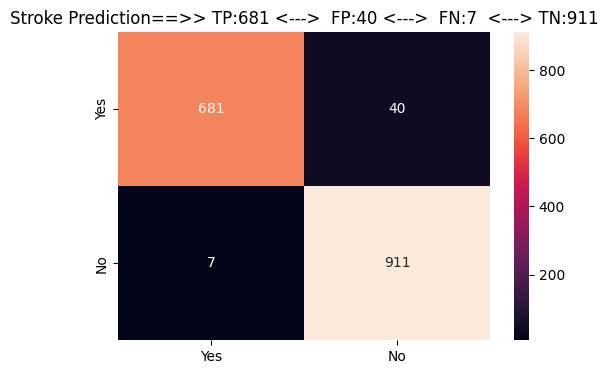

In [41]:
com_matrix  = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,4))
sn.heatmap(com_matrix, fmt='d', annot=True, xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
TP, FP, FN, TN = com_matrix.flatten()
plt.title('Stroke Prediction==>> TP:{} <--->  FP:{} <--->  FN:{}  <---> TN:{}'.format(TP, FP, FN, TN))
plt.show()

In [35]:
# mY OWN PERSONAL Lerning ... (DON'T DOCUMENT THIS... )

In [36]:
TP, FP, FN, TN = com_matrix.flatten()
accuracy = (TP+TN)/(TP+FP+FN+TN)
print(accuracy)

0.9713239780353874


In [37]:
'TP:{} <--->  FP:{} <--->  FN:{}  <---> TN:{}'.format(TP, FP, FN, TN)

'TP:681 <--->  FP:40 <--->  FN:7  <---> TN:911'